# Initialization and importing


## imports

In [1]:
!pip install -U -q PyDrive
!pip install pyyaml h5py
#!pip install q keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
import tensorflow as tf
from tensorflow import keras
import sklearn.externals
import joblib
import pickle
from tensorflow.keras.layers import Input
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
import os
from collections import Counter
from collections import defaultdict
from google.colab import drive
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from io import StringIO
from itertools import cycle
from keras.initializers import RandomNormal
from keras.layers import Dense
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from numpy import loadtxt
from scipy import interp
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, MiniBatchSparsePCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, RFE, RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import average_precision_score, precision_recall_curve, matthews_corrcoef, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, auc, cohen_kappa_score, precision_recall_curve, log_loss, roc_curve, classification_report, accuracy_score
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, LeaveOneOut, cross_val_score, cross_val_predict, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  Normalizer, MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, label_binarize, QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import os,sys
import pandas as pd
import plotly.express as px
import requests
import seaborn as sns
import sklearn
import sklearn.metrics
import statistics
import tensorflow
seed=75
np.random.seed(seed)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## reading files from drive

In [4]:
df = pd.read_csv('/content/drive/MyDrive/project/pr_er_her2.csv' ,sep=',')
rna_seq = pd.read_csv('/content/drive/MyDrive/project/x_rna_seq2.csv' ,sep=',')
mutation=pd.read_csv('/content/drive/MyDrive/project/y_mutations2.csv',sep=',')

mutation=pd.read_csv('/content/drive/MyDrive/project/y_mutations2.csv',sep=',')

In [5]:
subtype_file=pd.read_csv('/content/drive/MyDrive/project/subtype_file.csv',sep=',')

In [6]:
df=df.replace(np.nan,"unknown")
rna_seq=rna_seq.replace(np.nan,0)
df=df.rename(columns={df.columns[0]: "ID"})
rna_seq=rna_seq.rename(columns={rna_seq.columns[0]:"ID"})
subtype_file=subtype_file.rename(columns={subtype_file.columns[0]:"ID"})
subtype_file=subtype_file.rename(columns={subtype_file.columns[1]:"Subtype"})
mutation=mutation.replace(np.nan,0)
mutation=mutation.rename(columns={mutation.columns[0]:"ID"})
mutation=mutation[['ID','TP53']]

In [7]:
file_RNA=pd.merge(rna_seq, df, how='inner', on=['ID'])
file_subtype_rna=pd.merge(rna_seq,subtype_file,how='inner', on=['ID'])

In [8]:
file_RNA_her2=file_RNA.copy()
file_RNA_her2.drop(file_RNA_her2[(file_RNA_her2['her2 receptor']!="Negative") & (file_RNA_her2['her2 receptor']!="Positive")].index, inplace=True)

In [9]:
p53=pd.merge(mutation, rna_seq, how='inner', on=['ID'])
p53=p53.drop('ID',axis=1)
p53=p53.rename(columns={p53.columns[0]: "TP53"})

## pie charts

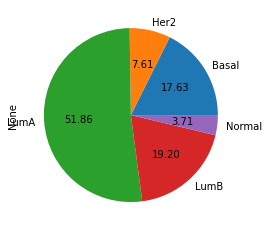

In [10]:
subtype_file.groupby(subtype_file.columns[1]).size().plot(kind='pie', autopct='%.2f')

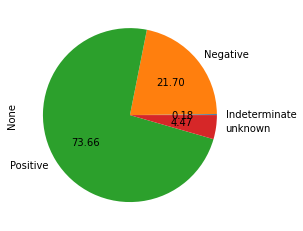

In [11]:
df.groupby('estrogen receptor').size().plot(kind='pie', autopct='%.2f')

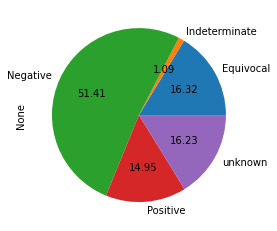

In [12]:
df.groupby('her2 receptor').size().plot(kind='pie', autopct='%.2f')

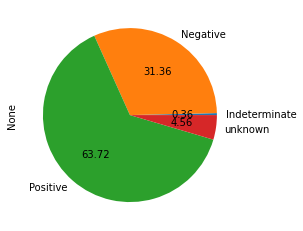

In [13]:
df.groupby('progesterone receptor').size().plot(kind='pie', autopct='%.2f')

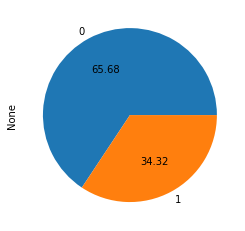

In [14]:
mutation.groupby('TP53').size().plot(kind='pie', autopct='%.2f')

# PCA

In [15]:
PCA_file=file_RNA.drop(['ID','estrogen receptor', 'her2 receptor','progesterone receptor'],axis=1)
pca = PCA(n_components=2)
pca_BC=pca.fit_transform(PCA_file)
pcaDf = pd.DataFrame(data = pca_BC, columns = ['pca1', 'pca2'])

## pca subtype

In [16]:
file_subtype_rna=file_subtype_rna.replace(np.nan,0)
#file_subtype_rna.replace(['LumA','LumB','Basal','Her2','Normal'],[1,2,3,4,0],inplace=True)

In [17]:
pcaSubytpe=pcaDf.copy()
pcaSubytpe["Subtype"]=file_subtype_rna[file_subtype_rna.columns[-1]]

## p53 PCA

In [18]:
pcaP53=pcaDf.copy()
pcaP53["TP53"]=p53["TP53"]
pcaP53.replace([np.nan],[0],inplace=True)

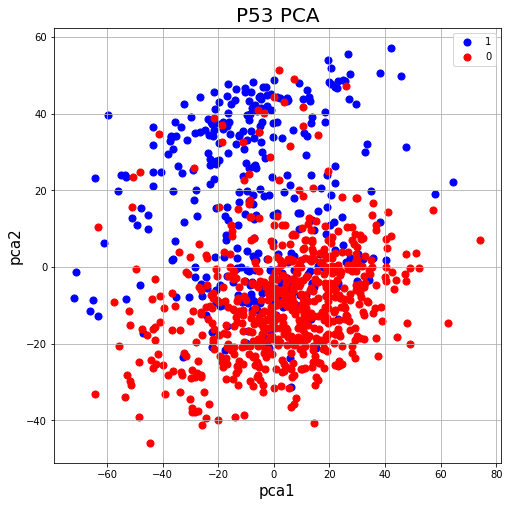

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('P53 PCA', fontsize = 20)
targets =[1,0]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = pcaP53['TP53'] == target
    ax.scatter(pcaP53.loc[indicesToKeep, 'pca1']
               , pcaP53.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

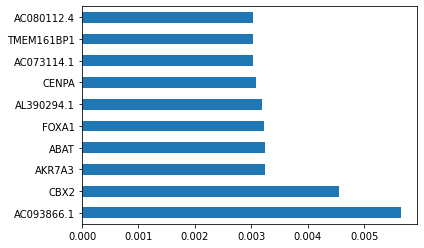

In [20]:
X = p53.iloc[:,1:]
y = p53.iloc[:,0]

model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Estrogen PCA

In [21]:
pcaDf["Estrogen"]=file_RNA["estrogen receptor"]
pcaDf["Her2"]=file_RNA["her2 receptor"]
pcaDf["Progesterone"]=file_RNA["progesterone receptor"]
pcaDf.replace(["Positive","Negative","Indeterminate","Equivocal",np.nan],["Positive","Negative","unknown","unknown","unknown"],inplace=True)

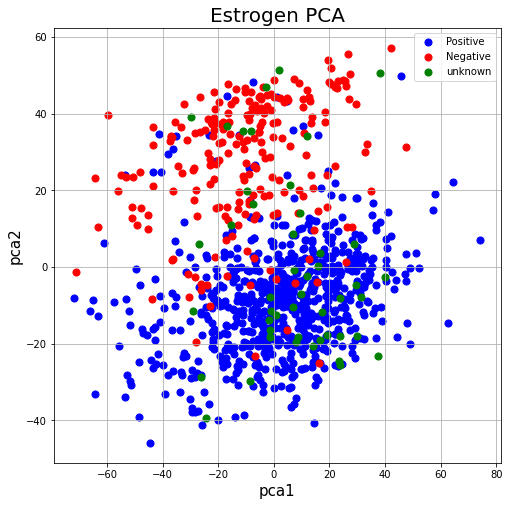

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('Estrogen PCA', fontsize = 20)
targets =["Positive","Negative","unknown"]
colors = ['b', 'r','g']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['Estrogen'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'pca1'], pcaDf.loc[indicesToKeep, 'pca2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

The top genes associate with Estrogen type of breast cancer


In [23]:
X = file_RNA.iloc[:,1:-3] 
y = file_RNA.iloc[:,-3]   
file_RNA.columns[-3]

'estrogen receptor'

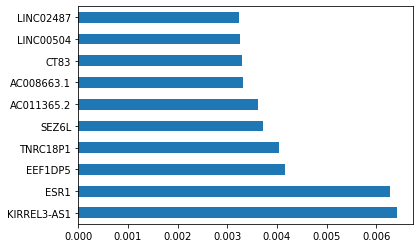

In [24]:
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Progesterone PCA

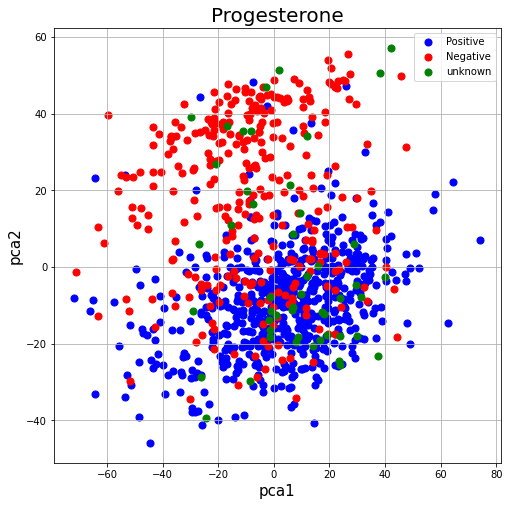

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('Progesterone', fontsize = 20)
targets =["Positive","Negative","unknown"]
colors = ['b', 'r','g']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['Progesterone'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'pca1'], pcaDf.loc[indicesToKeep, 'pca2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

The top genes associate with Progesterone type of breast cancer

In [26]:
X = file_RNA.iloc[:,1:-3] 
y = file_RNA.iloc[:,-1]   
file_RNA.columns[-1]

'progesterone receptor'

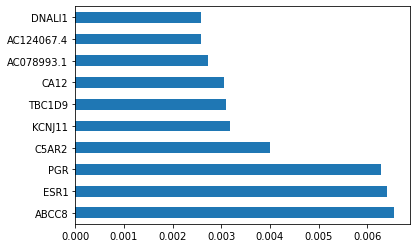

In [27]:
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## her2 pca 

### Her2 PCA

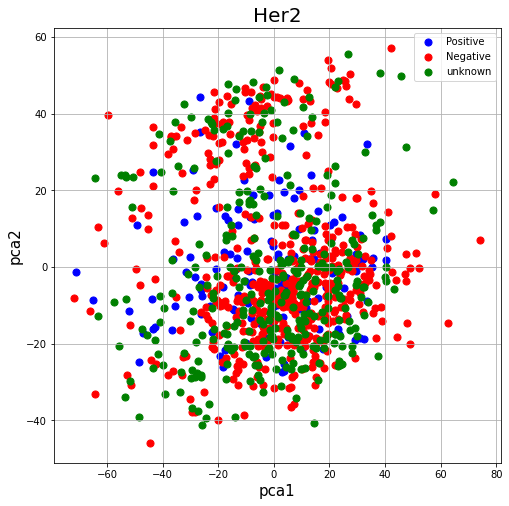

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('Her2', fontsize = 20)
targets =["Positive","Negative","unknown"]
colors = ['b', 'r','g']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['Her2'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'pca1'], pcaDf.loc[indicesToKeep, 'pca2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

The top genes associate with Progesterone type of breast cancer

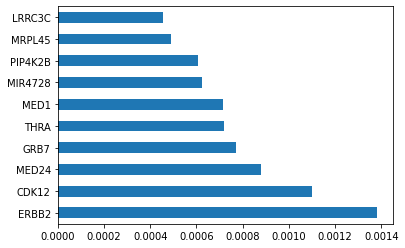

In [29]:
X = file_RNA.iloc[:,1:-3]  #independent columns
y = file_RNA.iloc[:,-2]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###  her2 (only positive and negative cases)

In [30]:
PCA_file_her2=file_RNA_her2.drop(['ID','estrogen receptor', 'her2 receptor','progesterone receptor'],axis=1)
pca = PCA(n_components=2)
pca_her2_BC=pca.fit_transform(PCA_file_her2)
pcaDf_her2 = pd.DataFrame(data = pca_her2_BC, columns = ['pca1', 'pca2'])
pcaDf_her2["Her2"]=file_RNA_her2["her2 receptor"]

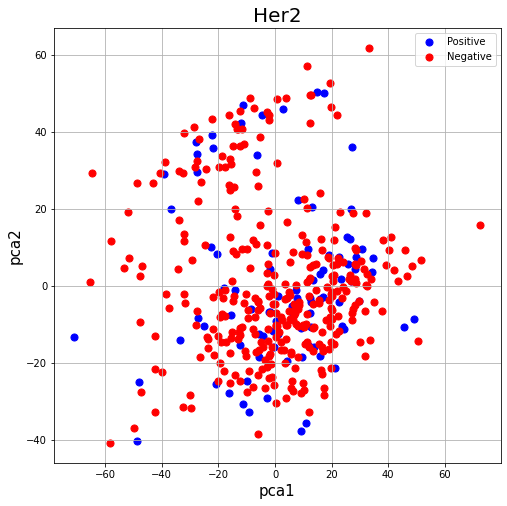

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('Her2', fontsize = 20)
targets =["Positive","Negative"]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf_her2['Her2'] == target
    ax.scatter(pcaDf_her2.loc[indicesToKeep, 'pca1'], pcaDf_her2.loc[indicesToKeep, 'pca2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

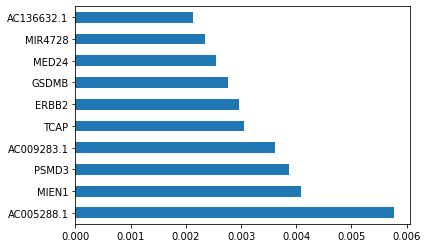

In [32]:
X = file_RNA_her2.iloc[:,1:-3] 
y = file_RNA_her2.iloc[:,-2]   

model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##subtype pca

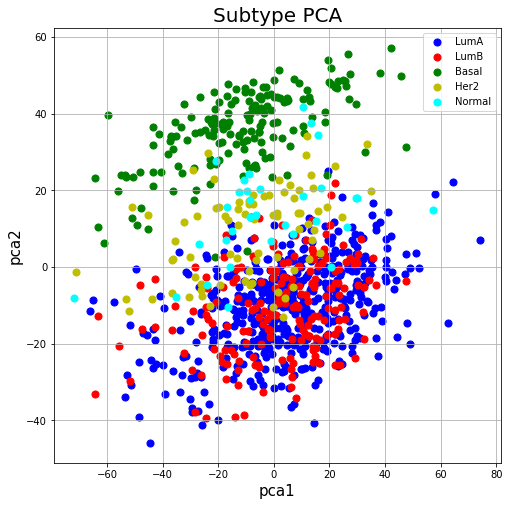

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca1', fontsize = 15)
ax.set_ylabel('pca2', fontsize = 15)
ax.set_title('Subtype PCA', fontsize = 20)
targets =['LumA','LumB','Basal','Her2','Normal']#[1,2,3,4,0]#
colors = ['b', 'r','g','y','#00FFFF']
for target, color in zip(targets,colors):
    indicesToKeep = pcaSubytpe["Subtype"] == target
    ax.scatter(pcaSubytpe.loc[indicesToKeep, 'pca1']
               , pcaSubytpe.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

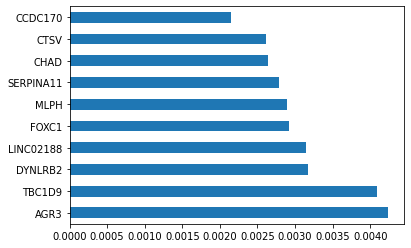

In [34]:
file_subtype_rna.replace(['LumA','LumB','Basal','Her2','Normal'],[1,2,3,4,0],inplace=True)
X = file_subtype_rna.iloc[:,1:-1]
y = file_subtype_rna.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Classification

## classifiers list

In [35]:
count=0
aaecount=0
figure=0
classifiers = [
    KNeighborsClassifier(5),
    LogisticRegression(C=0.1, multi_class= 'multinomial', solver='sag', random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42),
    LinearDiscriminantAnalysis(),
    #SVC(kernel='rbf', probability=True, random_state=42)
    ]

In [ ]:
new_input = pd.DataFrame((file_RNA.iloc[:,1:-3])[100:110],columns=(file_RNA.iloc[:,0:-3]).columns)
new_input=new_input.drop(new_input.columns[0],axis=1)
path = '/content/drive/MyDrive/project/output_10.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  new_input.to_csv(f)

In [ ]:
(file_RNA.iloc[:,-3:])[100:110]

,estrogen receptor,her2 receptor,progesterone receptor
100,Positive,Positive,Positive
101,Positive,unknown,Positive
102,Positive,Negative,Positive
103,Negative,Negative,Indeterminate
104,Positive,Negative,Positive
105,Positive,Negative,Positive
106,Positive,unknown,Positive
107,Positive,Negative,Positive
108,Positive,Positive,Negative
109,Positive,Positive,Positive


In [ ]:
new_input=pd.read_csv('/content/drive/MyDrive/project/output.csv',sep=',')

In [ ]:
new_input=new_input.drop(new_input.columns[0],axis=1)

In [36]:
file_RNA=file_RNA.replace(np.nan,"unknow")

In [37]:
file_RNA.iloc[:,1:-3]

,TSPAN6,TNMD,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,...,PAUPAR,AL512506.3,GIMAP1-GIMAP5,AC018638.8,LINC02246,AC233263.6,HERC2P7,SNORA50A.1,LINC01144,AC007389.5
0,3.800717,1.278754,3.424392,3.231724,2.733197,2.456366,3.371806,3.597146,3.361539,3.758988,...,0.00000,0.301030,0.30103,1.342423,1.477121,0.000000,0.000000,0.00000,2.139879,0.477121
1,3.645717,0.698970,3.486997,3.221414,3.320769,3.116940,3.089552,3.806994,3.512551,3.918188,...,0.00000,0.845098,0.00000,1.934498,1.176091,0.000000,0.000000,0.00000,1.799341,0.000000
2,3.401401,2.572872,3.398461,3.111934,2.985426,3.619093,4.222768,3.834802,3.618048,3.821645,...,0.00000,1.079181,0.00000,1.924279,1.079181,0.000000,0.000000,0.30103,1.518514,0.778151
3,3.469085,2.264818,3.307710,3.453471,3.050380,3.115943,3.882581,3.632660,3.581153,3.511750,...,0.00000,0.903090,0.00000,2.107210,1.763428,0.602060,0.301030,0.00000,1.748188,0.845098
4,3.427486,1.672098,3.208173,3.352761,3.012415,2.594393,3.501607,3.625004,3.262688,3.392169,...,0.30103,0.778151,0.00000,1.897627,1.322219,0.000000,0.301030,0.30103,1.973128,1.255273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2.927883,0.477121,3.033021,3.346939,2.952792,2.436163,2.965202,3.365488,3.295787,3.374748,...,0.00000,0.000000,0.00000,1.041393,1.176091,0.000000,0.000000,0.00000,1.579784,1.342423
975,2.920645,0.954243,3.173478,3.274850,2.854306,2.408240,2.624282,3.324282,3.626238,3.365113,...,0.00000,0.301030,0.00000,1.944483,1.431364,0.000000,0.301030,0.00000,2.110590,0.301030
976,3.435048,2.195900,3.064083,3.302980,2.729974,2.457882,3.222976,3.040998,3.485295,3.449633,...,0.00000,0.477121,0.00000,1.778151,1.556303,0.000000,0.000000,0.00000,2.000000,0.477121
977,3.325516,1.929419,3.785259,3.461198,3.311754,2.670246,3.981864,3.632356,3.745699,3.676511,...,0.00000,0.903090,0.30103,1.380211,1.518514,0.000000,0.477121,0.00000,2.338456,0.301030


## Estrogen classification

In [38]:
X = file_RNA.iloc[:,1:-3] 
X = X[:].values 
y = file_RNA.iloc[:,-3]    
y=y[:].values

In [39]:
best_er_model=0
best_pre=0
best_acc=0
y_test_er=0
kf = KFold(n_splits=5) 
kf.get_n_splits(X)
KFold(n_splits=5, random_state=seed, shuffle=True)

for train_index, test_index in kf.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  qt = QuantileTransformer(n_quantiles=10, random_state=seed)
  qt.fit(x_train)

  x_train=qt.transform(x_train)
  x_test=qt.transform(x_test)

  for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("=="*15)
    print(name)
    print('Results')
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    pre=precision_score(y_test, y_pred, average='weighted')
    if (best_acc<acc):
      y_test_er=y_test_er
      best_pre=pre
      best_acc=acc
      best_er_model=clf
    print("Precision: {:.4%}".format(pre))
 

KNeighborsClassifier
Results
Accuracy: 82.6531%
Precision: 76.6553%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 86.2245%
Precision: 80.4359%
DecisionTreeClassifier
Results
Accuracy: 77.5510%
Precision: 74.5486%
RandomForestClassifier
Results
Accuracy: 86.7347%
Precision: 80.8625%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 85.2041%
Precision: 79.3517%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 84.6939%
Precision: 81.4367%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 89.7959%
Precision: 85.6183%
DecisionTreeClassifier
Results
Accuracy: 84.1837%
Precision: 84.1511%
RandomForestClassifier
Results
Accuracy: 87.7551%
Precision: 83.7430%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 89.2857%
Precision: 85.1220%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 89.7959%
Precision: 86.2558%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 91.3265%
Precision: 87.6258%
DecisionTreeClassifier
Results
Accuracy: 81.1224%
Precision: 82.8930%
RandomForestClassifier
Results
Accuracy: 92.3469%
Precision: 88.6662%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 91.8367%
Precision: 88.0795%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 82.6531%
Precision: 78.6120%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 88.2653%
Precision: 84.1240%
DecisionTreeClassifier
Results
Accuracy: 78.0612%
Precision: 78.7454%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
Results
Accuracy: 86.7347%
Precision: 82.5935%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 87.7551%
Precision: 83.6127%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 85.6410%
Precision: 81.6559%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 88.7179%
Precision: 85.0371%
DecisionTreeClassifier
Results
Accuracy: 75.8974%
Precision: 81.2701%
RandomForestClassifier
Results
Accuracy: 87.6923%
Precision: 83.8840%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 87.6923%
Precision: 84.0483%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
filename = '/content/drive/MyDrive/project/er_model.sav'
joblib.dump(best_er_model, filename)

['/content/drive/MyDrive/project/er_model.sav']

In [41]:
best_er_model

RandomForestClassifier(criterion='entropy', random_state=42)

## Progesterone classification

In [ ]:
X = file_RNA.iloc[:,1:-3]  
y = file_RNA.iloc[:,-1] 
X = X[:].values   
y=y[:].values

In [ ]:
best_pr_model=0
best_acc=0

kf = KFold(n_splits=5) 
kf.get_n_splits(X)
KFold(n_splits=5, random_state=seed, shuffle=True)
for train_index, test_index in kf.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  qt = QuantileTransformer(n_quantiles=10, random_state=seed)
  qt.fit(x_train)
  x_train=qt.transform(x_train)
  x_test=qt.transform(x_test)

  for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("=="*15)
    print(name)
    print('Results')
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    pre=precision_score(y_test, y_pred, average='weighted')
    print("Precision: {:.4%}".format(pre))
    if (acc>best_acc):
      best_acc=acc
      best_pr_model=clf

KNeighborsClassifier
Results
Accuracy: 80.1020%
Precision: 74.2510%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 81.1224%
Precision: 75.2460%
DecisionTreeClassifier
Results
Accuracy: 68.8776%
Precision: 69.1085%
RandomForestClassifier
Results
Accuracy: 82.6531%
Precision: 76.5767%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 84.1837%
Precision: 77.9363%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 79.5918%
Precision: 78.7883%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 86.2245%
Precision: 82.7004%
DecisionTreeClassifier
Results
Accuracy: 81.6327%
Precision: 80.3242%
RandomForestClassifier
Results
Accuracy: 86.7347%
Precision: 83.1275%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 86.7347%
Precision: 83.3268%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 73.4694%
Precision: 70.3495%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 77.0408%
Precision: 73.4238%
DecisionTreeClassifier
Results
Accuracy: 71.4286%
Precision: 70.6863%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
Results
Accuracy: 77.0408%
Precision: 73.6985%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 77.0408%
Precision: 73.4238%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 81.6327%
Precision: 80.5431%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 85.2041%
Precision: 81.8950%
DecisionTreeClassifier
Results
Accuracy: 78.0612%
Precision: 79.2744%
RandomForestClassifier
Results
Accuracy: 85.7143%
Precision: 83.1598%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 85.2041%
Precision: 82.2344%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
Results
Accuracy: 78.4615%
Precision: 75.3702%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 83.0769%
Precision: 79.7504%
DecisionTreeClassifier
Results
Accuracy: 74.3590%
Precision: 74.6178%
RandomForestClassifier
Results
Accuracy: 83.5897%
Precision: 80.3936%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 82.5641%
Precision: 79.2889%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
filename = '/content/drive/MyDrive/project/pr_model.sav'
joblib.dump(best_pr_model, filename)

['/content/drive/MyDrive/project/pr_model.sav']

In [ ]:
filename = '/content/drive/MyDrive/project/pr_model.sav'
loaded_model = joblib.load(filename)
print(loaded_model)
print(loaded_model.predict(new_input))

RandomForestClassifier(criterion='entropy', random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


['Positive' 'Positive' 'Positive' 'Positive']


## p53 classification

In [ ]:
X = p53.iloc[:,1:]  
y = p53.iloc[:,0] 
X = X[:].values   
y=y[:].values

In [ ]:
best_p53_model=0
best_acc=0

kf = KFold(n_splits=5) 
kf.get_n_splits(X)
KFold(n_splits=5, random_state=seed, shuffle=True)
for train_index, test_index in kf.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  qt = QuantileTransformer(n_quantiles=10, random_state=seed)
  qt.fit(x_train)
  x_train=qt.transform(x_train)
  x_test=qt.transform(x_test)

  for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("=="*15)
    print(name)
    print('Results')
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    if (acc>best_acc):
      best_acc=acc
      best_p53_model=clf
    print("Precision: {:.4%}".format(precision_score(y_test, y_pred, average='weighted')))

KNeighborsClassifier
Results
Accuracy: 80.1020%
Precision: 80.4250%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 85.7143%
Precision: 85.5790%
DecisionTreeClassifier
Results
Accuracy: 75.5102%
Precision: 75.8851%
RandomForestClassifier
Results
Accuracy: 85.7143%
Precision: 86.0195%
LinearDiscriminantAnalysis
Results
Accuracy: 86.2245%
Precision: 86.1273%
KNeighborsClassifier
Results
Accuracy: 76.5306%
Precision: 76.1467%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 85.2041%
Precision: 85.5493%
DecisionTreeClassifier
Results
Accuracy: 79.0816%
Precision: 79.5121%
RandomForestClassifier
Results
Accuracy: 83.1633%
Precision: 82.9332%
LinearDiscriminantAnalysis
Results
Accuracy: 87.2449%
Precision: 87.2928%
KNeighborsClassifier
Results
Accuracy: 83.6735%
Precision: 84.3918%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 88.7755%
Precision: 88.7266%
DecisionTreeClassifier
Results
Accuracy: 81.6327%
Precision: 81.7822%
RandomForestClassifier
Results
Accuracy: 85.2041%
Precision: 85.3148%
LinearDiscriminantAnalysis
Results
Accuracy: 87.7551%
Precision: 87.7369%
KNeighborsClassifier
Results
Accuracy: 76.0204%
Precision: 76.9139%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 83.1633%
Precision: 83.0658%
DecisionTreeClassifier
Results
Accuracy: 81.1224%
Precision: 80.9285%
RandomForestClassifier
Results
Accuracy: 79.5918%
Precision: 79.9547%
LinearDiscriminantAnalysis
Results
Accuracy: 82.6531%
Precision: 82.5660%
KNeighborsClassifier
Results
Accuracy: 78.9744%
Precision: 78.3350%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 87.1795%
Precision: 87.0023%
DecisionTreeClassifier
Results
Accuracy: 81.5385%
Precision: 82.3684%
RandomForestClassifier
Results
Accuracy: 87.6923%
Precision: 87.8724%
LinearDiscriminantAnalysis
Results
Accuracy: 85.1282%
Precision: 84.8749%


In [ ]:
filename = '/content/drive/MyDrive/project/p53_model.sav'
joblib.dump(best_p53_model, filename)

['/content/drive/MyDrive/project/p53_model.sav']

## Her2 classification

In [ ]:
X = file_RNA_her2.iloc[:,1:-3] 
y = file_RNA_her2.iloc[:,-2]  
X = X[:].values   
y=y[:].values

In [ ]:
best_her2_model=0
best_acc=0

kf = KFold(n_splits=5) 
kf.get_n_splits(X)
KFold(n_splits=5, random_state=seed, shuffle=True)
for train_index, test_index in kf.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  qt = QuantileTransformer(n_quantiles=10, random_state=seed)
  qt.fit(x_train)
  x_train=qt.transform(x_train)
  x_test=qt.transform(x_test)

  for clf in classifiers:
           clf.fit(x_train, y_train)
           name = clf.__class__.__name__
           print("=="*15)
           print(name)
           print('Results')
           y_pred = clf.predict(x_test)
           y_pred_proba = clf.predict_proba(x_test)
           y_test_binarize = label_binarize(y_test, classes=[0,1,2,3])
           acc=accuracy_score(y_test, y_pred)
           print("Accuracy: {:.4%}".format(acc))
           if (acc>best_acc):
             best_acc=acc
             best_her2_model=clf
           print("Precision: {:.4%}".format(precision_score(y_test, y_pred, average='weighted')))


KNeighborsClassifier
Results
Accuracy: 79.0698%
Precision: 76.8992%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 82.1705%
Precision: 83.3463%
DecisionTreeClassifier
Results
Accuracy: 78.2946%
Precision: 76.9158%
RandomForestClassifier
Results
Accuracy: 84.4961%
Precision: 87.1018%
LinearDiscriminantAnalysis
Results
Accuracy: 82.9457%
Precision: 84.1313%
KNeighborsClassifier
Results
Accuracy: 81.3953%
Precision: 82.7692%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 86.0465%
Precision: 85.8462%
DecisionTreeClassifier
Results
Accuracy: 82.9457%
Precision: 82.9457%
RandomForestClassifier
Results
Accuracy: 83.7209%
Precision: 86.5937%
LinearDiscriminantAnalysis
Results
Accuracy: 85.2713%
Precision: 85.5672%
KNeighborsClassifier
Results
Accuracy: 86.8217%
Precision: 85.2668%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 89.9225%
Precision: 89.4441%
DecisionTreeClassifier
Results
Accuracy: 77.5194%
Precision: 82.8951%
RandomForestClassifier
Results
Accuracy: 89.1473%
Precision: 89.1214%
LinearDiscriminantAnalysis
Results
Accuracy: 89.9225%
Precision: 89.2622%
KNeighborsClassifier
Results
Accuracy: 77.5194%
Precision: 74.9470%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 85.2713%
Precision: 85.5672%
DecisionTreeClassifier
Results
Accuracy: 79.0698%
Precision: 79.8020%
RandomForestClassifier
Results
Accuracy: 86.0465%
Precision: 88.2117%
LinearDiscriminantAnalysis
Results
Accuracy: 85.2713%
Precision: 87.6632%
KNeighborsClassifier
Results
Accuracy: 72.8682%
Precision: 70.4265%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 82.9457%
Precision: 84.1107%
DecisionTreeClassifier
Results
Accuracy: 77.5194%
Precision: 77.0514%
RandomForestClassifier
Results
Accuracy: 79.0698%
Precision: 83.8589%
LinearDiscriminantAnalysis
Results
Accuracy: 83.7209%
Precision: 85.6237%


In [ ]:
file_RNA_her2

In [ ]:
file_RNA_her2=file_RNA_her2.replace(np.nan,"unknow")
#new_input = pd.DataFrame((file_RNA_her2.iloc[:,1:-3])[0:4],columns=(file_RNA_her2.iloc[:,0:-3]).columns)
#new_input=new_input.drop(new_input.columns[0],axis=1)
filename = '/content/drive/MyDrive/project/her2_model.sav'
joblib.dump(best_her2_model, filename)

['/content/drive/MyDrive/project/her2_model.sav']

In [ ]:
# some time later...

loaded_model = joblib.load(filename)
print(loaded_model,loaded_model.predict(new_input))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


LogisticRegression(C=0.1, multi_class='multinomial', random_state=42,
                   solver='sag') ['Positive' 'Negative' 'Negative' 'Negative']


## subtype

In [ ]:
file_subtype_rna=file_subtype_rna.replace(np.nan,"Normal")

In [ ]:
X = file_subtype_rna.iloc[:,1:-1]  
y = file_subtype_rna.iloc[:,-1] 
X = X[:].values   
y=y[:].values

In [ ]:
file_subtype_rna.iloc[:,-1]

0        Her2
1       Basal
2       Basal
3        LumA
4        LumA
        ...  
974      LumA
975      LumB
976      LumA
977      LumB
978    Normal
Name: Subtype, Length: 979, dtype: object

In [ ]:
best_subtype_model=0
kf = KFold(n_splits=5) 
kf.get_n_splits(X)
KFold(n_splits=5, random_state=seed, shuffle=True)
for train_index, test_index in kf.split(X):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  qt = QuantileTransformer(n_quantiles=10, random_state=seed)
  qt.fit(x_train)
  x_train=qt.transform(x_train)
  x_test=qt.transform(x_test)

  for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("=="*15)
    print(name)
    print('Results')
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)
    y_test_binarize = label_binarize(y_test, classes=[0,1,2,3])
    acc=accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    if (acc>best_acc):
      best_acc=acc
      best_subtype_model=clf
    print("Precision: {:.4%}".format(precision_score(y_test, y_pred, average='weighted')))

KNeighborsClassifier
Results
Accuracy: 78.0612%
Precision: 81.0428%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 85.7143%
Precision: 86.7382%
DecisionTreeClassifier
Results
Accuracy: 80.6122%
Precision: 80.8155%
RandomForestClassifier
Results
Accuracy: 84.1837%
Precision: 86.0806%
LinearDiscriminantAnalysis
Results
Accuracy: 86.2245%
Precision: 86.6242%
KNeighborsClassifier
Results
Accuracy: 78.5714%
Precision: 78.8378%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 90.3061%
Precision: 90.0467%
DecisionTreeClassifier
Results
Accuracy: 78.5714%
Precision: 81.6445%
RandomForestClassifier
Results
Accuracy: 87.2449%
Precision: 87.7693%
LinearDiscriminantAnalysis
Results
Accuracy: 91.3265%
Precision: 91.3579%
KNeighborsClassifier
Results
Accuracy: 78.0612%
Precision: 81.0463%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression
Results
Accuracy: 88.7755%
Precision: 89.4269%
DecisionTreeClassifier
Results
Accuracy: 79.0816%
Precision: 76.9631%
RandomForestClassifier
Results
Accuracy: 84.6939%
Precision: 81.3486%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 88.7755%
Precision: 88.5479%
KNeighborsClassifier
Results
Accuracy: 72.9592%
Precision: 76.9310%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 82.1429%
Precision: 79.7058%
DecisionTreeClassifier
Results
Accuracy: 75.5102%
Precision: 76.2026%
RandomForestClassifier
Results
Accuracy: 82.1429%
Precision: 79.7375%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 85.2041%
Precision: 85.1837%
KNeighborsClassifier
Results
Accuracy: 73.8462%
Precision: 71.6336%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
Results
Accuracy: 85.1282%
Precision: 81.7989%
DecisionTreeClassifier
Results
Accuracy: 75.8974%
Precision: 77.7796%
RandomForestClassifier
Results
Accuracy: 81.0256%
Precision: 78.2202%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearDiscriminantAnalysis
Results
Accuracy: 86.6667%
Precision: 86.8684%


In [ ]:
best_subtype_model

In [ ]:
joblib.dump(best_subtype_model,  '/content/drive/MyDrive/project/subtype_model.sav')

In [ ]:
filename = '/content/drive/MyDrive/project/subtype_model.sav'
loaded_model = joblib.load(filename)
print(loaded_model.predict(new_input))